In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [96]:
df=pd.read_csv('Dataset\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Min of pregnencies , Glucose, Diabetes, Blood Pressure, etc cannot be zero so either we can remove such data or replace it with mean value

In [100]:
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

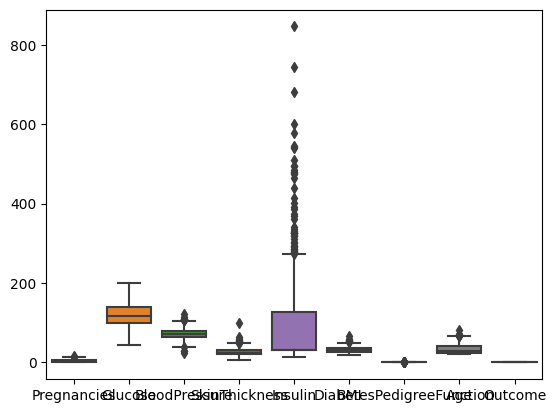

In [102]:
sns.boxplot(df)


In [103]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train,y_train)
X_test_scaled=scaler.transform(X_test)

In [104]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47


In [105]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [106]:

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters={'penalty':['l1','l2','elasticnet'],'C':[i for i in range (0,10)], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'multi_class':['ovr','multinomial']}
clf=GridSearchCV(lr,param_grid=parameters,cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [107]:
clf.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}

In [108]:
LogisticRegressor=LogisticRegression(C=1,penalty='l1',solver='liblinear',multi_class='ovr')


In [109]:
LogisticRegressor.fit(X_train_scaled,y_train)
y_pred=LogisticRegressor.predict(X_test_scaled)
LogisticRegressor.predict_proba(X_test_scaled)

array([[0.76885418, 0.23114582],
       [0.80343623, 0.19656377],
       [0.88181157, 0.11818843],
       [0.86968501, 0.13031499],
       [0.49964066, 0.50035934],
       [0.59244543, 0.40755457],
       [0.98935296, 0.01064704],
       [0.62567114, 0.37432886],
       [0.40495465, 0.59504535],
       [0.21105289, 0.78894711],
       [0.77920735, 0.22079265],
       [0.07880259, 0.92119741],
       [0.58316532, 0.41683468],
       [0.76717758, 0.23282242],
       [0.94189531, 0.05810469],
       [0.66323429, 0.33676571],
       [0.88422663, 0.11577337],
       [0.93786018, 0.06213982],
       [0.21386164, 0.78613836],
       [0.37458577, 0.62541423],
       [0.81245955, 0.18754045],
       [0.93078635, 0.06921365],
       [0.5358214 , 0.4641786 ],
       [0.90988428, 0.09011572],
       [0.44071024, 0.55928976],
       [0.08582018, 0.91417982],
       [0.89492349, 0.10507651],
       [0.97115259, 0.02884741],
       [0.70689716, 0.29310284],
       [0.9053244 , 0.0946756 ],
       [0.

In [110]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=10)
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LogisticRegressor,X_train,y_train,scoring="recall",cv=cv))

0.5879856598509849

 0.587 is average accuracy of my model prediction

In [111]:
print(confusion_matrix(y_test,y_pred))

[[123  28]
 [ 33  47]]


In [112]:
print(accuracy_score(y_test,y_pred))

0.7359307359307359


In [113]:
pickle.dump(LogisticRegressor, open('Diabetes_prediction.pkl', 'wb'))

In [114]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))